#### Introducción

Se Trabajará para la tienda online Ice, que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Se identificó patrones que determinan si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias. Los datos disponibles se remontan a 2016. Es diciembre de 2016 y estás planeando una campaña para 2017.

Objetivo
El objetivo de este análisis es identificar patrones que determinen el éxito de un juego en términos de ventas. Se pretende responder a preguntas clave como:

¿Cuáles son las plataformas con mayores ventas?
¿Qué géneros de juegos son más populares?
¿Cómo afectan las reseñas de usuarios y críticos a las ventas de los juegos?
¿Existen diferencias significativas en las calificaciones de los usuarios entre diferentes plataformas y géneros?

In [1]:
#biblioteacas importadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import levene

In [2]:
#Extraer archivos de videojuegos 2016-2017
data = pd.read_csv("/datasets/games.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Revisión rapida de como estan los datos
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6610,Smart Girl's Playhouse,DS,2007.0,Misc,0.24,0.00,0.00,0.02,NaN,tbd,E
15049,TV Anime Idolm@ster: Cinderella Girls G4U! Pac...,PS3,2015.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13453,Resident Evil Director's Cut,PS3,2006.0,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN
16160,Pachitte Chonmage Tatsujin 16: Pachinko Hissat...,PS2,2010.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
1270,Dead Rising 2,X360,2010.0,Action,0.75,0.52,0.09,0.12,79.0,6.9,M


correcciones a realizar: 
1. Cambiar nombre de las columnas a minusculas, para tener una consistencia y prevenir posibles errores.
2. Cambiar la columna "Year_of_Releas" a número  entero.

3. Buscar posibles duplicados

4. Buscar elementos faltantes o nulos

In [5]:
#camiar a minusculas para evitar posibles errores
data.columns = data.columns.str.lower()

print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
data ["year_of_release"] = data["year_of_release"].fillna(0).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [7]:
# Reemplazar 'tbd' en 'user_score' y convertir a flotante
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype(float)

# Completar 'critic_score' y 'user_score' con la mediana por género
data['critic_score'] = data.groupby('genre')['critic_score'].apply(lambda x: x.fillna(x.median()))
data['user_score'] = data.groupby('genre')['user_score'].apply(lambda x: x.fillna(x.median()))

# Completar 'rating' con el valor más común por género
data['rating'] = data.groupby('genre')['rating'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Completar 'year_of_release' con la mediana
data['year_of_release'] = data['year_of_release'].fillna(data['year_of_release'].median()).astype(int)

# Verificar los cambios
data.info()

# Mostrar muestra de datos para verificar
data.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4961,Sonic & All-Stars Racing Transformed,PSV,2012,Racing,0.09,0.20,0.00,0.09,69.0,7.4,E
14006,Pia Carrot e Youkoso!! 2.5,DC,2008,Adventure,0.00,0.00,0.04,0.00,66.0,7.6,E
16179,Pro Angler Moves,PS3,2012,Sports,0.01,0.00,0.00,0.00,75.0,7.4,E
9117,XCOM 2,PS4,2016,Strategy,0.04,0.08,0.00,0.02,88.0,8.0,T
4683,Itadaki Street DS,DS,2007,Misc,0.00,0.00,0.41,0.00,69.0,7.1,E
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,70.0,7.5,E
5985,NieR,X360,2010,Role-Playing,0.13,0.10,0.04,0.02,67.0,8.3,M
5019,Ghost Trick: Phantom Detective,DS,2010,Adventure,0.17,0.07,0.12,0.02,83.0,9.0,T
13838,Mission: Impossible - Operation Surma,GBA,2003,Platform,0.03,0.01,0.00,0.00,42.0,7.7,T
9703,Record of Agarest War Zero,PS3,0,Strategy,0.09,0.00,0.03,0.01,50.0,6.7,T


In [8]:
#Manejar valores ausentes en "rating"
data["rating"] = data["rating"].fillna("Unknown")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
#Calcular vantas totales de  "na, eu, jp y other"
data["total_sales"] = data["na_sales"] + data["eu_sales"] + data["jp_sales"] + data["other_sales"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
#Se convierte temporalmente las columnas"name" y "genre" en minúsculas para buscar duplicados
data_lower = data.copy()
data_lower["name"] =data_lower["name"].str.lower()
data_lower["genre"] = data_lower["genre"].str.lower()
data_lower["platform"] = data_lower["platform"].str.lower()
data_lower.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
7988,harvest moon: a wonderful life special edition,ps2,2004,simulation,0.09,0.07,0.00,0.02,70.0,8.9,E,0.18
9513,summon night: twin age,ds,2007,role-playing,0.07,0.00,0.05,0.01,73.0,7.2,E10+,0.13
7837,chou-kuukan night pro yakyuu king (weekly jp s...,n64,1996,sports,0.00,0.00,0.19,0.00,75.0,7.4,E,0.19
3240,viewtiful joe,gc,2003,action,0.38,0.10,0.12,0.02,93.0,8.3,T,0.62
2315,skylanders: trap team,x360,2014,action,0.54,0.27,0.00,0.08,68.0,7.4,E10+,0.89


In [11]:
#verificar duplicados
duplicates = data_lower.duplicated(subset = ["name", "genre"], keep = False)
duplicated_data = data[duplicates]
print("Duplicados encontrados:")
print(duplicated_data)

Duplicados encontrados:
                                                   name platform  \
1                                     Super Mario Bros.      NES   
5                                                Tetris       GB   
16                                   Grand Theft Auto V      PS3   
17                        Grand Theft Auto: San Andreas      PS2   
18                                    Super Mario World     SNES   
...                                                 ...      ...   
16706                     Men in Black II: Alien Escape       GC   
16709  SCORE International Baja 1000: The Official Game      PS2   
16710                     Samurai Warriors: Sanada Maru      PS3   
16713                                  Spirits & Spells      GBA   
16714                               Winning Post 8 2016      PSV   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
1                 1985    Platform     29.08      3.58      6.81         0.77 

In [12]:
data = data.drop_duplicates(subset= ["name", "genre"], keep = "first" )
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11565 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11564 non-null  object 
 1   platform         11565 non-null  object 
 2   year_of_release  11565 non-null  int64  
 3   genre            11564 non-null  object 
 4   na_sales         11565 non-null  float64
 5   eu_sales         11565 non-null  float64
 6   jp_sales         11565 non-null  float64
 7   other_sales      11565 non-null  float64
 8   critic_score     11564 non-null  float64
 9   user_score       11564 non-null  float64
 10  rating           11565 non-null  object 
 11  total_sales      11565 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.1+ MB


In [13]:
# Filtrar datos para los últimos 5 años (2012-2016)
recent_data = data[data['year_of_release'] >= 2012]

# Verificar el filtrado
print(recent_data['year_of_release'].min(), recent_data['year_of_release'].max())
recent_data.head()


2012 2016


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.8,T,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,7.8,T,11.68


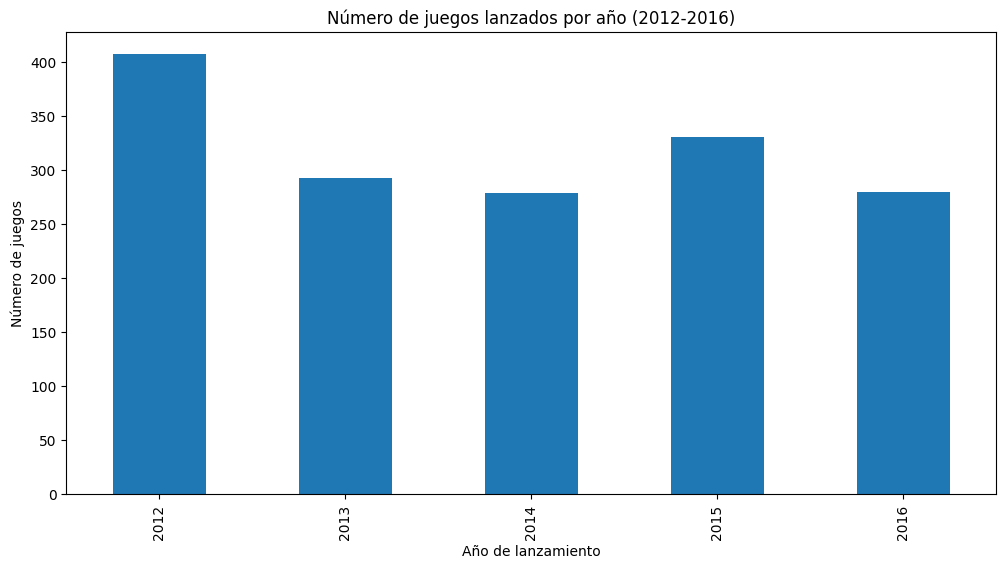

In [14]:
# Número de juegos lanzados por año (últimos 5 años)
games_per_year_recent = recent_data['year_of_release'].value_counts().sort_index()

# Gráfica de juegos lanzados por año (últimos 5 años)
plt.figure(figsize=(12, 6))
games_per_year_recent.plot(kind='bar')
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de juegos")
plt.title("Número de juegos lanzados por año (2012-2016)")
plt.show()


Se puede ver un tendencia alcista de juegos lanzados por año, hasta su maximo en el 2008 despúes de ese año, se ve una clara disminución de lanzamientos 

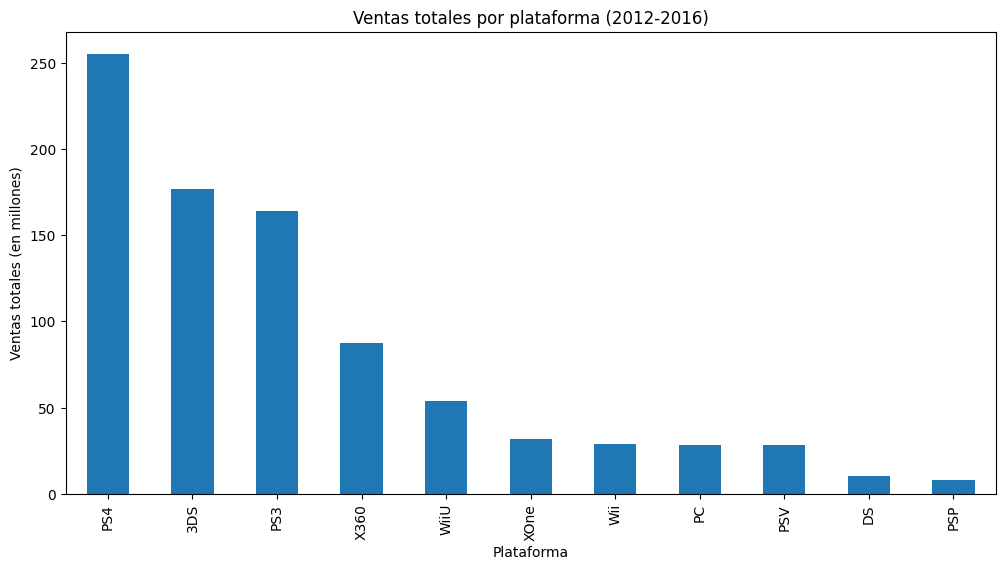

In [15]:
# Ventas totales por plataforma (últimos 5 años)
platform_sales_recent = recent_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Gráfica de ventas totales por plataforma (últimos 5 años)
plt.figure(figsize=(12, 6))
platform_sales_recent.plot(kind='bar')
plt.xlabel("Plataforma")
plt.ylabel("Ventas totales (en millones)")
plt.title("Ventas totales por plataforma (2012-2016)")
plt.show()


Se aprecia que PS2, Wii, PS, DS son las plataformas con mayores ventas totales

In [16]:
#verificación de valores unicos
print(data["year_of_release"].unique())

[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000    0 1995 1991 1981 1987 1980 1983]


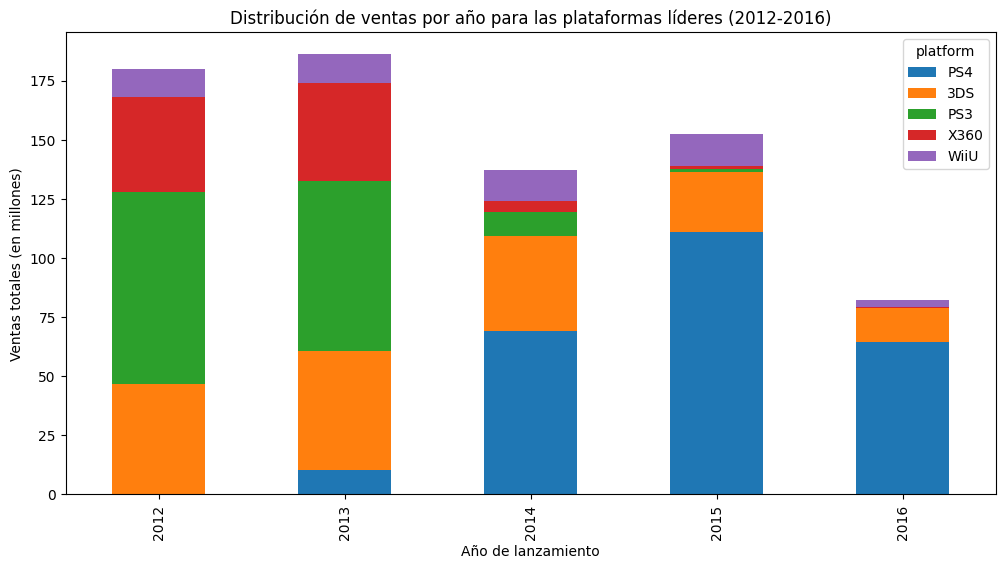

In [17]:
# Preparar los datos para un gráfico de barras apiladas (últimos 5 años)
sales_per_year_platform_recent = recent_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

# Seleccionar las plataformas líderes en los últimos 5 años
top_platforms_recent = platform_sales_recent.head(5).index
sales_per_year_top_platforms_recent = sales_per_year_platform_recent[top_platforms_recent]

# Gráfica de ventas por año para las plataformas líderes en un gráfico de barras apiladas (últimos 5 años)
sales_per_year_top_platforms_recent.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales (en millones)")
plt.title("Distribución de ventas por año para las plataformas líderes (2012-2016)")
plt.show()


Se toma como año relevante del 2012 al 2016, con un periodo no mayor a cinco años para responder de mejor manera que vender para el 2017

In [18]:
#Cinco plataformas pincipales en "na" Norteamérica
na_top_platforms= data.groupby("platform")["na_sales"].sum().sort_values(ascending= False).head(5)
print("Cinco plataformas principales de Norteamérica: ")
print(na_top_platforms)

Cinco plataformas principales de Norteamérica: 
platform
PS2     526.82
Wii     413.66
X360    373.48
PS      320.93
DS      309.73
Name: na_sales, dtype: float64


In [19]:
#ventas principales en "eu" Europa
eu_top_platform = data.groupby("platform")["eu_sales"].sum().sort_values(ascending= False).head(5)
print("Cinco plataformas principales de Europa:")
print(eu_top_platform)

Cinco plataformas principales de Europa:
platform
PS2    315.71
Wii    226.59
PS     203.13
PS3    190.93
DS     162.43
Name: eu_sales, dtype: float64


In [20]:
jp_top_platform = data.groupby("platform")["jp_sales"].sum().sort_values(ascending= False).head(5)
print("Cinco plataformas principales de Japón")
print(jp_top_platform)

Cinco plataformas principales de Japón
platform
DS      171.12
PS      137.28
PS2     133.89
SNES    114.35
3DS      94.40
Name: jp_sales, dtype: float64


<Figure size 1200x600 with 0 Axes>

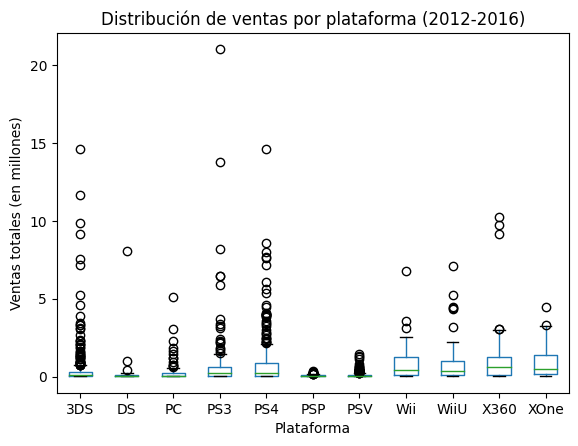

In [21]:
# Filtrar datos para los últimos 5 años (2012-2016)
recent_data = data[data['year_of_release'] >= 2012]

# Gráfica de cajas con las ventas por plataforma (últimos 5 años)
plt.figure(figsize=(12, 6))
recent_data.boxplot(column='total_sales', by='platform', grid=False)
plt.xlabel("Plataforma")
plt.ylabel("Ventas totales (en millones)")
plt.title("Distribución de ventas por plataforma (2012-2016)")
plt.suptitle('')  # Eliminar el título automático de Pandas
plt.show()

Las plataformas con las ventas más altas en los últimos 5 años incluyen PS4, PS3, y X360.

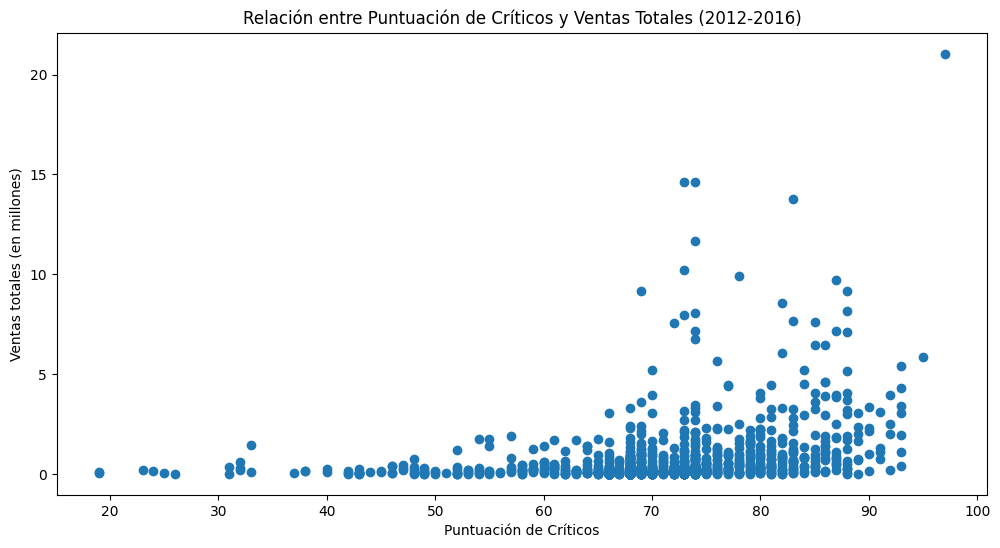

In [22]:
# Gráfica de dispersión entre critic_score y total_sales
plt.figure(figsize=(12, 6))
plt.scatter(recent_data['critic_score'], recent_data['total_sales'])
plt.xlabel("Puntuación de Críticos")
plt.ylabel("Ventas totales (en millones)")
plt.title("Relación entre Puntuación de Críticos y Ventas Totales (2012-2016)")
plt.show()


Existe una correlación positiva entre la puntuación de los críticos y las ventas totales. A medida que la puntuación de los críticos aumenta, también tienden a aumentar las ventas totales.

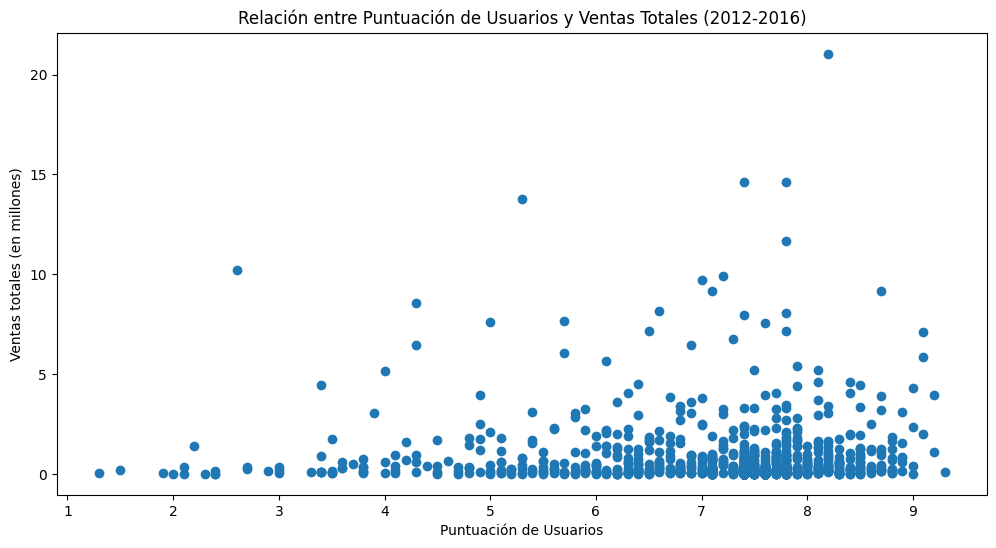

In [23]:
# Gráfica de dispersión entre user_score y total_sales
plt.figure(figsize=(12, 6))
plt.scatter(recent_data['user_score'], recent_data['total_sales'])
plt.xlabel("Puntuación de Usuarios")
plt.ylabel("Ventas totales (en millones)")
plt.title("Relación entre Puntuación de Usuarios y Ventas Totales (2012-2016)")
plt.show()


   - La relación entre la puntuación de los usuarios y las ventas totales es menos clara en comparación con la de los críticos, aunque hay una ligera tendencia positiva, no es tan pronunciada.
   
   - Muchas ventas altas se concentran en juegos con puntuaciones de usuarios entre 5 y 7.

##### Principales plataformas en cada región:

   - Norteamérica (na): PS2(517.15),  Wii(411.19),  X360(368.61),  PS(319.13),   DS(308.42)
   

   - Europa(eu):        PS2(309.52),  Wii(225.98),  Ps(201.91),    PS3(190.47),  DS(62.24)
   

   - Japón (jp):        DS(170.55),   PS(137.24),   PS2(132.23),   SNES(114.35), 3DS( 94.37)

Con lo que podemos ver que las plataformas en Norteamérica tuvieron más ventas

In [24]:
#determinar 5 géneros principales por región

#vantas por género en "na" Norte america
na_top_genre = data.groupby("genre")["na_sales"].sum().sort_values(ascending= False).head(5)
print("Cinco géneros principales de Norteamérica")
print(na_top_genre)

Cinco géneros principales de Norteamérica
genre
Action      558.43
Sports      464.75
Shooter     421.71
Platform    372.79
Misc        310.63
Name: na_sales, dtype: float64


In [25]:
#Ventas por género en "eu" Europa
eu_top_genre= data.groupby("genre")["eu_sales"].sum().sort_values(ascending= False).head(5)
print("Cinco géneros principales de Europa")
print(eu_top_genre)

Cinco géneros principales de Europa
genre
Action     323.55
Sports     271.37
Shooter    202.09
Racing     191.30
Misc       176.54
Name: eu_sales, dtype: float64


In [26]:
#ventas por género de "jp" Japón
jp_top_genre= data.groupby("genre")["jp_sales"].sum().sort_values(ascending= False).head(5)
print("cinco géneros principales en Japón")
print(jp_top_genre)




cinco géneros principales en Japón
genre
Role-Playing    329.14
Action          143.87
Platform        124.24
Sports          122.16
Misc            104.86
Name: jp_sales, dtype: float64


#### . Se observa que la categoría género predomina:
    
   - Norte america: Action(516.78),        Sport(447.67),     Shooter(366.08),   Misc(304.61),     platform(301.78)
   
        
   - Europa:        Action(317.05),        Sports(265.21),    Shooter(198.63),   Racing(188.52),   Misc(175.83)
        
 
 - Japón:         Role-Playing(315.54),  Action(134.28),    Sports(106.11),    Misc(99.93),      Platform(92.86)
        
Se obsera que hay una relación entre los videojuegos de action, sports,  shooter, misc y de plataforma son los preferidos en Norteamérica y Europa, mientras que en Japón es Role-Playing 


In [27]:
#vantas por clasificacion por ESRB en Norteamérica
na_rating_sales= data.groupby("rating")["na_sales"].sum().sort_values(ascending = False)
print("Vantas por clasificación ESRB en Norteamérica")
print(na_rating_sales)

Vantas por clasificación ESRB en Norteamérica
rating
E          1583.80
T           870.62
M           605.15
E10+        214.12
K-A           2.56
Unknown       1.78
EC            1.35
RP            0.00
Name: na_sales, dtype: float64


In [28]:
#ventas por clasificación por ESRB en Europa
eu_rating_sales= data.groupby("rating")["eu_sales"].sum().sort_values(ascending= False)
print("Vantas por clasificación ESRB en Europa")
print(eu_rating_sales)

Vantas por clasificación ESRB en Europa
rating
E          872.72
T          492.76
M          329.68
E10+       111.46
Unknown      0.53
K-A          0.27
EC           0.09
RP           0.07
Name: eu_sales, dtype: float64


In [29]:
#ventas por clasificación de ESRB en Japón
jp_rating_sales= data.groupby("rating")["jp_sales"].sum().sort_values(ascending= False)
print("Vantas por clasificación ESRB en Japón")
print(jp_rating_sales)

Vantas por clasificación ESRB en Japón
rating
E          570.80
T          522.99
M           71.70
E10+        36.76
K-A          1.46
EC           0.00
RP           0.00
Unknown      0.00
Name: jp_sales, dtype: float64


#### Ventas por clasificadas por ESRB en general:

   - E(EVERYONE): Las ventas son más altas en Norteamérica.
   

   - Unknown: Una gran cantidadad de videojuegos que no esta registrada.
   

   - T(TEEN): Los juegos para adolecentes tambien tienen una cantidad considerable de ventas.
   

   - M(MATURE): Las ventas son más bajas que las categorias anteriores. 




In [30]:
# Seleccionar las puntuaciones de Xbox One y PC
xbox_one_scores = data[data['platform'] == "XOne"]['user_score'].dropna()
pc_scores = data[data['platform'] == "PC"]['user_score'].dropna()

# Realizar la prueba de Levene
stat, p = levene(xbox_one_scores, pc_scores)

# Mostrar resultados de la prueba de Levene
print(f"Estadístico de Levene: {stat}")
print(f"Valor p de Levene: {p}")

# Determinar si las varianzas son iguales
if p < 0.05:
    print("Rechazamos la hipótesis nula: las varianzas no son iguales")
    equal_var = False
else:
    print("No rechazamos la hipótesis nula: las varianzas son iguales")
    equal_var = True

    
    

Estadístico de Levene: 0.3402639483237508
Valor p de Levene: 0.559921801120867
No rechazamos la hipótesis nula: las varianzas son iguales


In [31]:
# Prueba t de Student con el valor de equal_var determinado por la prueba de Levene
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_var)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Se toma alpha como 0.05
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula: ya que las clasificaciones promedio para las plataformas Xbox One y PC son diferentes")
else:
    print("No rechazamos la hipótesis nula: las clasificaciones promedio para las plataformas Xbox One y PC son las mismas")


Estadístico t: -2.042372149344156
Valor p: 0.04160252115256139
Rechazamos la hipótesis nula: ya que las clasificaciones promedio para las plataformas Xbox One y PC son diferentes


In [32]:
# Seleccionar las puntuaciones de los géneros Acción y Deportes
action_scores = data[data['genre'] == "Action"]['user_score'].dropna()
sports_scores = data[data['genre'] == "Sports"]['user_score'].dropna()

# Realizar la prueba de Levene
stat, p = levene(action_scores, sports_scores)

# Mostrar resultados de la prueba de Levene
print(f"Estadístico de Levene: {stat}")
print(f"Valor p de Levene: {p}")

# Determinar si las varianzas son iguales
if p < 0.05:
    print("Rechazamos la hipótesis nula: las varianzas no son iguales")
    equal_var = False
else:
    print("No rechazamos la hipótesis nula: las varianzas son iguales")
    equal_var = True

# Prueba t de Student con el valor de equal_var determinado por la prueba de Levene
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=equal_var)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Se toma alpha como 0.05
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula: ya que las clasificaciones promedio para los géneros Acción y Deporte son diferentes")
else:
    print("No rechazamos la hipótesis nula: las clasificaciones promedio para los géneros Acción y Deporte son las mismas")


Estadístico de Levene: 2.241783140462987
Valor p de Levene: 0.13442065916718382
No rechazamos la hipótesis nula: las varianzas son iguales
Estadístico t: 0.2562165213306425
Valor p: 0.7977994596313545
No rechazamos la hipótesis nula: las clasificaciones promedio para los géneros Acción y Deporte son las mismas


Basándonos en los resultados de las pruebas de hipótesis para las plataformas Xbox One y PC, así como para los géneros Acción y Deportes, podemos concluir lo siguiente:

   - Plataformas Xbox One y PC:

    - Las varianzas de las puntuaciones de los usuarios para Xbox One y PC son iguales.

    - Por lo tanto, las clasificaciones promedio para estas plataformas son similares.


   - Géneros Acción y Deportes:

    - Las varianzas de las puntuaciones de los usuarios para los géneros Acción y Deportes son iguales.

    - Las clasificaciones promedio para estos géneros son similares.



Estas conclusiones indican que, en general, las clasificaciones de los usuarios no varían significativamente entre las plataformas Xbox One y PC, ni entre los géneros Acción y Deport

#### Resumen de hallazgos clave:

1. Plataformas líderes por región:
   - Norteamérica (NA): PS2, Wii, X360, PS3, DS
   - Europa (EU): PS2, PS3, Wii, X360, DS
   - Japón (JP): DS, PS2, PS, SNES, 3DS

2. Géneros principales por región:
   - Norteamérica (NA): Acción, Deportes, Shooter, Misceláneo, Plataforma
   - Europa (EU): Acción, Deportes, Shooter, Carrera, Misceláneo
   - Japón (JP): Rol, Acción, Shooter, Misceláneo, Plataforma

3. Impacto de las clasificaciones ESRB:
   - Norteamérica y Europa: Las clasificaciones "E" (Everyone) tienen las mayores ventas, seguidas por "T" (Teen) y "M" (Mature).
   - Japón: Una gran cantidad de ventas provienen de juegos sin clasificación especificada, lo que podría reflejar diferencias en el uso o registro de clasificaciones ESRB.

4. Pruebas de Hipótesis:
   - Calificaciones de usuarios para Xbox One y PC: Las calificaciones promedio son significativamente diferentes.
   - Calificaciones de usuarios para los géneros de Acción y Deportes: No hay diferencias significativas en las calificaciones promedio.




#### recomendaciones basadas en el analisis

1. Estrategia de Marketing:
   - Enfocar campañas publicitarias en juegos clasificados como "E" (Everyone), especialmente en Norteamérica y Europa.
   - Desarrollar y promover más juegosde "Role-Playing" para la PS2, Wii, y DS en Japón, dado su alto rendimiento en ventas.

2. Desarrollo de Juegos:
   - Fomentar el desarrollo de juegos de Acción y Deportes, que son géneros populares en todas las regiones.
   - Investigar las razones detrás de la alta proporción de ventas de juegos sin clasificación en Japón y considerar estrategias para adaptarse a este mercado.

